# first thing is to understand the variable that is used for the analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Bad key "lines.markerfacecolor" on line 11 in
/usr/share/matplotlib/mpl-data/stylelib/classic.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution

Bad key "lines.markeredgecolor" on line 12 in
/usr/share/matplotlib/mpl-data/stylelib/classic.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
df = pd.read_csv("data/pseudo_facebook.tsv" , sep='\t')

In [3]:
df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [4]:
df.tail()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
98998,1268299,68,4,1945,4,female,541.0,2118,341,3996,18089,3505,11887,491,6202
98999,1256153,18,12,1995,3,female,21.0,1968,1720,4401,13412,4399,10592,2,2820
99000,1195943,15,10,1998,5,female,111.0,2002,1524,11959,12554,11959,11462,0,1092
99001,1468023,23,11,1990,4,female,416.0,2560,185,4506,6516,4506,5760,0,756
99002,1397896,39,15,1974,5,female,397.0,2049,768,9410,12443,9410,9530,0,2913


# our goal is to understand our user's behavior and their demographics 

In [5]:
df.columns

Index(['userid', 'age', 'dob_day', 'dob_year', 'dob_month', 'gender', 'tenure',
       'friend_count', 'friendships_initiated', 'likes', 'likes_received',
       'mobile_likes', 'mobile_likes_received', 'www_likes',
       'www_likes_received'],
      dtype='object')

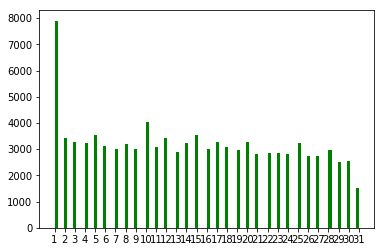

In [6]:
plt.hist(df.dob_day , color='g' , range=(1,31) , bins=100 , )
x_val = [i for i in range(df.dob_day.min() , df.dob_day.max()+1)]
plt.xticks(x_val)
plt.show()

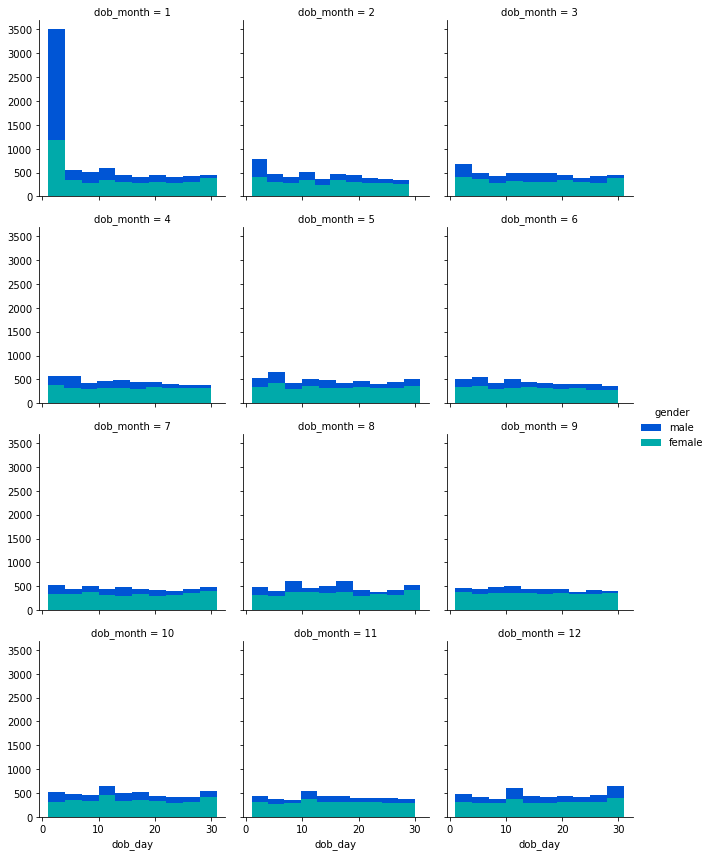

In [7]:
x = sns.FacetGrid( col="dob_month" , data=df ,col_wrap=3 ,hue="gender" , palette="winter")
x.map(plt.hist ,"dob_day" ).add_legend()


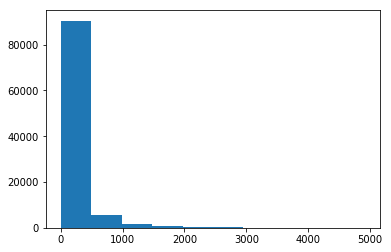

In [8]:
plt.hist(df.friend_count )

plt.show()


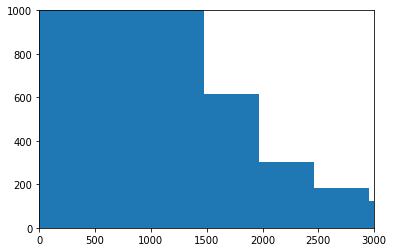

In [9]:
plt.hist(df.friend_count)
plt.ylim(ymin=0 , ymax=1000)
plt.xlim(xmin=0 , xmax=3000)
plt.show()

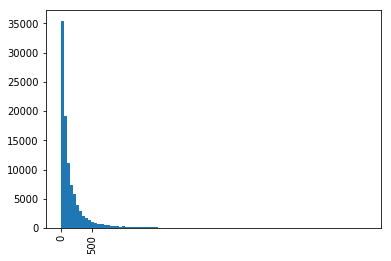

In [10]:

plt.hist(df.friend_count , bins=100)
plt.xticks(np.arange(0 ,1000 , step=500) , rotation="vertical")
plt.show()

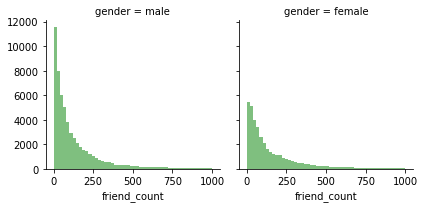

In [11]:
x = sns.FacetGrid(col="gender" , data=df.loc[df.friend_count <= 1000] , )
x.map(plt.hist , "friend_count" , color="green"  , alpha=0.5, bins=50)


# statistics by gender

In [12]:
gender_df = df.groupby(['gender'])

In [13]:
gender_df.get_group("female")['friend_count'].describe()

count    40254.000000
mean       241.969941
std        476.039706
min          0.000000
25%         37.000000
50%         96.000000
75%        244.000000
max       4923.000000
Name: friend_count, dtype: float64

In [14]:
gender_df.get_group("male")['friend_count'].describe() 

count    58574.000000
mean       165.035459
std        308.466702
min          0.000000
25%         27.000000
50%         74.000000
75%        182.000000
max       4917.000000
Name: friend_count, dtype: float64

In [15]:
df.head(1)

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0


# plotting the tenure

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


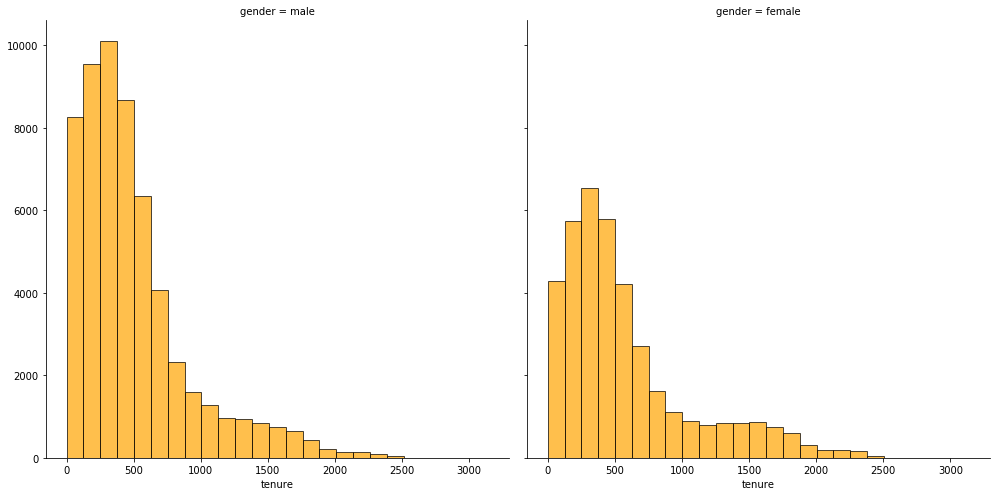

In [16]:
x = sns.FacetGrid(col="gender" , data=df.loc[df.friend_count <= 1000] ,size=7 )
x.map(plt.hist , "tenure" ,  color="orange" , alpha=0.7 ,edgecolor='black', bins=25)


In [17]:
df["tenure_365"]  = df.tenure.apply(lambda x : x/365)

In [18]:
df.head(1)

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,tenure_365
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0,0.728767


# Ploting the tenure by year

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


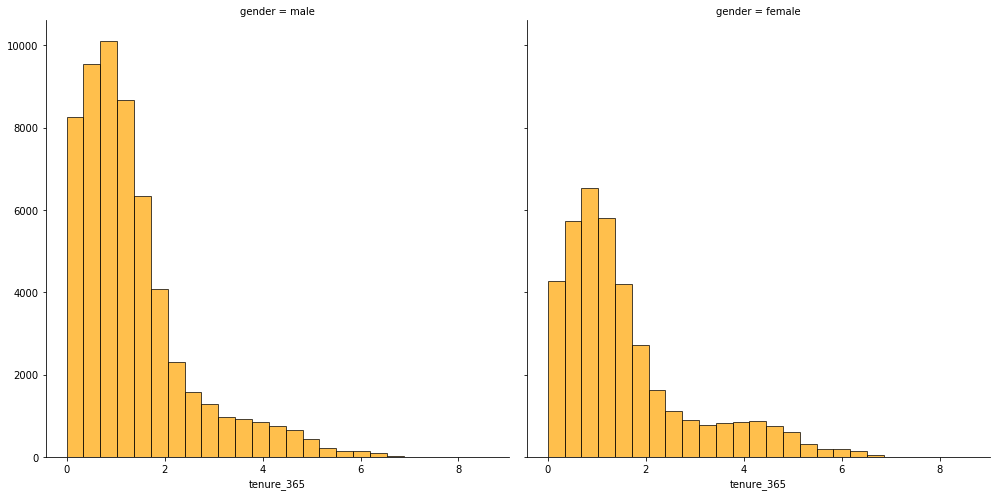

In [19]:
x = sns.FacetGrid(col="gender" , data=df.loc[df.friend_count <= 1000] ,size=7 )

x.map(plt.hist , "tenure_365" ,  color="orange" , alpha=0.7 ,edgecolor='black', bins=25)

# Ploting the age

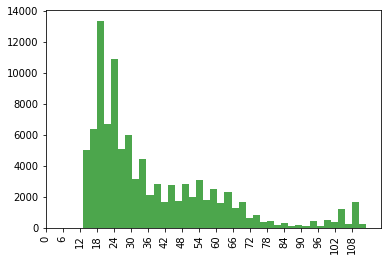

In [20]:
plt.hist(df.age , bins=40 , color="green" , alpha=0.7)
plt.xticks(np.arange(0 , df.age.max() , step=6),rotation=90)
plt.show()

In [21]:
df.age.describe()

count    99003.000000
mean        37.280224
std         22.589748
min         13.000000
25%         20.000000
50%         28.000000
75%         50.000000
max        113.000000
Name: age, dtype: float64

# Transforming data Variable Distribution

## we're just transforming the data(friends count) for the further acces or to make it as normal distribution 

* types of transformation
* sqrt  , log10 

In [22]:
sqrt_vals = df.friend_count.apply(np.sqrt)

In [23]:
log_vals = df.friend_count.apply(lambda x : np.log10(x+1))

In [24]:
df.friend_count.describe()

count    99003.000000
mean       196.350787
std        387.304229
min          0.000000
25%         31.000000
50%         82.000000
75%        206.000000
max       4923.000000
Name: friend_count, dtype: float64

In [25]:
sqrt_vals.describe()

count    99003.000000
mean        11.087630
std          8.568313
min          0.000000
25%          5.567764
50%          9.055385
75%         14.352700
max         70.164093
Name: friend_count, dtype: float64

In [26]:
log_vals.describe()

count    99003.000000
mean         1.868052
std          0.665934
min          0.000000
25%          1.505150
50%          1.919078
75%          2.315970
max          3.692318
Name: friend_count, dtype: float64

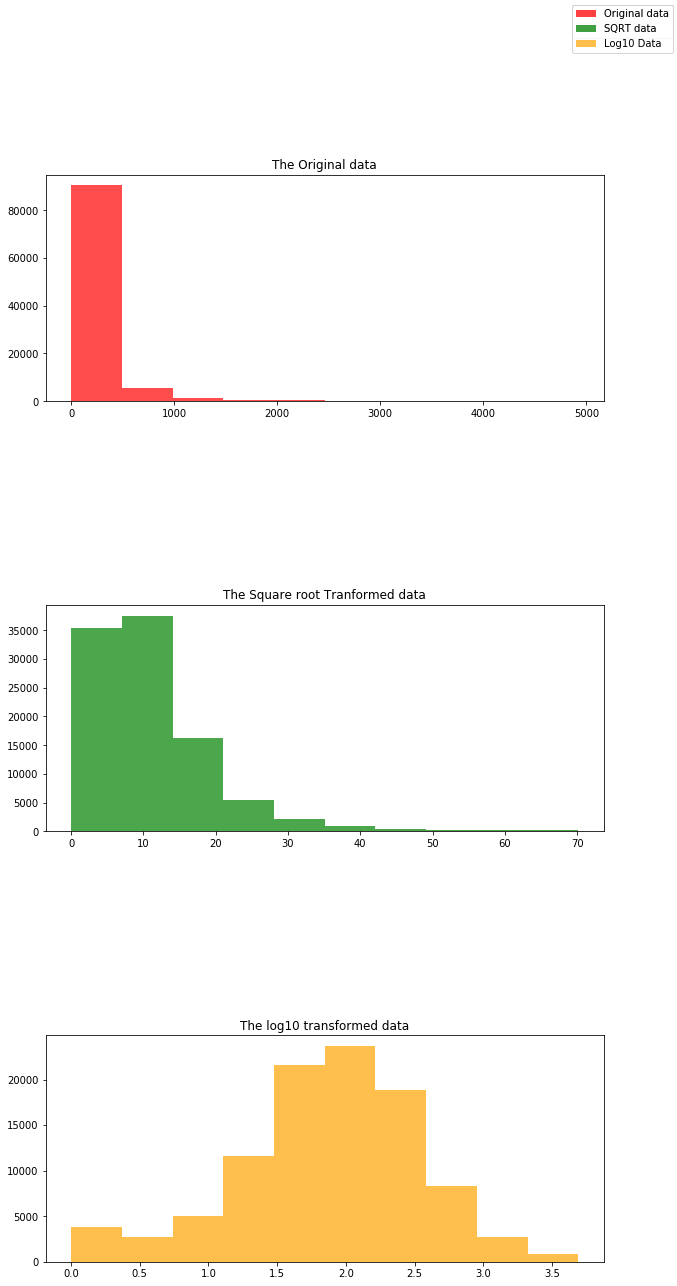

In [27]:
fig = plt.figure(figsize=(10,20))

fig.add_subplot(3 , 1, 1)
plt.hist(df.friend_count , color="red" , label="Original data" , alpha=0.7)
fig.legend(loc="upper right")
plt.title("The Original data")
fig.subplots_adjust(hspace = 0.9)

fig.add_subplot(3 , 1, 2)
plt.hist(sqrt_vals , color="green" , label="SQRT data" , alpha=0.7)
plt.title("The Square root Tranformed data")
fig.legend(loc="upper right")

fig.subplots_adjust(hspace = 0.9)

fig.add_subplot(3 , 1, 3)
plt.hist(log_vals , color="orange" , label="Log10 Data" , alpha=0.7)
plt.title("The log10 transformed data")
fig.legend(loc="upper right")

plt.show()

# Ploting the average on male and female friend count [frequency polygons]


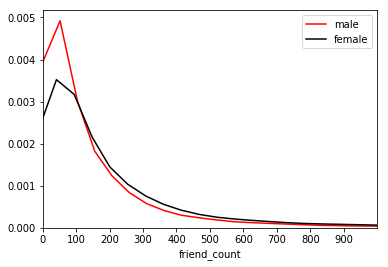

In [28]:
sns.distplot(gender_df.get_group("male")["friend_count"] ,label='male' ,color="red" , hist=False  )
g =sns.distplot(gender_df.get_group("female")["friend_count"] , label='female' , color="black" , hist=False )
g.set(xlim=(0,1000))
g.set_xticks(np.arange(0,1000 , step=100))
g

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


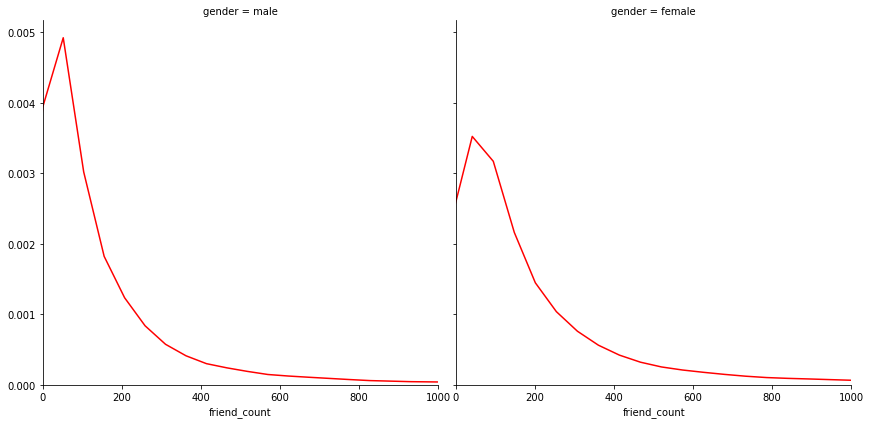

In [29]:

x = sns.FacetGrid(col="gender" , data=df , size=6  )
x.map(sns.distplot , "friend_count" , kde=True , hist=False ,color='r')
x.set(xlim=(0,1000))
x.add_legend()
x

### Plotting likes between gender

[(0, 1000)]

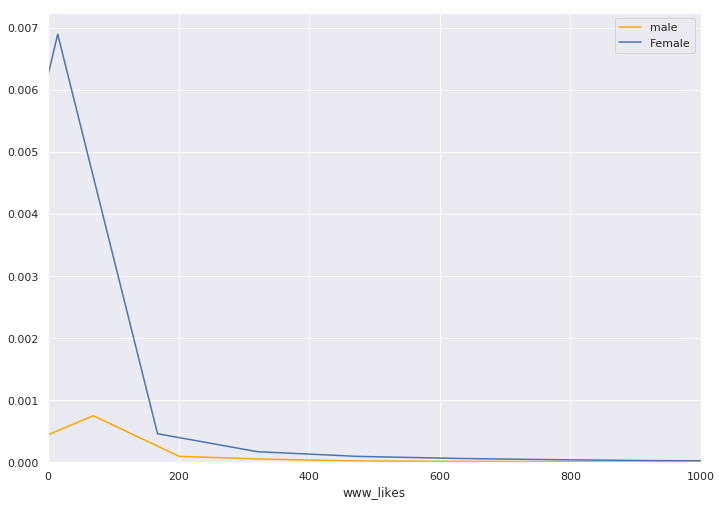

In [30]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(gender_df.get_group("male")["www_likes"] ,color="orange", label="male",hist=False)
g = sns.distplot(gender_df.get_group("female")["www_likes"], label="Female" , hist=False)
g.set(xlim=(0,1000))

In [31]:
log_10_male = gender_df.get_group("male")["www_likes"].apply(lambda x :np.log10(x+1))

In [32]:
log_10_female = gender_df.get_group("female")["www_likes"].apply(lambda x :np.log10(x+1))

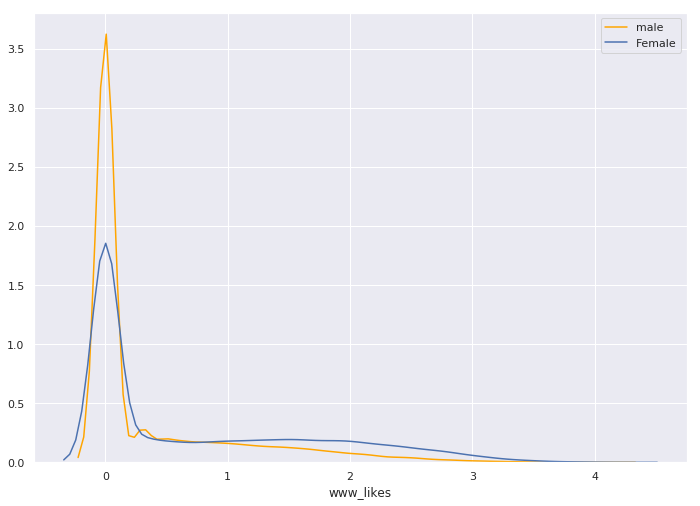

In [33]:
sns.distplot(log_10_male ,color="orange", label="male",hist=False)
g = sns.distplot(log_10_female, label="Female" , hist=False)


In [34]:
log_10_male

0        0.000000
2        0.000000
4        0.000000
5        0.000000
6        0.000000
           ...   
98975    3.404320
98985    2.753583
98988    2.622214
98990    3.108565
98993    1.826075
Name: www_likes, Length: 58574, dtype: float64

In [35]:
df.head(1)

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,tenure_365
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0,0.728767


In [36]:
# The likes by gender numerical analysis


In [37]:
gender_df.get_group("male")["www_likes"].describe()

count    58574.000000
mean        24.416550
std        186.598445
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max      12903.000000
Name: www_likes, dtype: float64

In [38]:
gender_df.get_group("male")["www_likes"].sum()

1430175

In [39]:
gender_df.get_group("female")["www_likes"].describe()

count    40254.000000
mean        87.138297
std        384.019335
min          0.000000
25%          0.000000
50%          0.000000
75%         25.000000
max      14865.000000
Name: www_likes, dtype: float64

In [40]:
gender_df.get_group("female")["www_likes"].sum()

3507665

In [41]:
# seems like womans have more likes than mens
#        womens like :3507665               mens like:  1430175 

[(0, 350)]

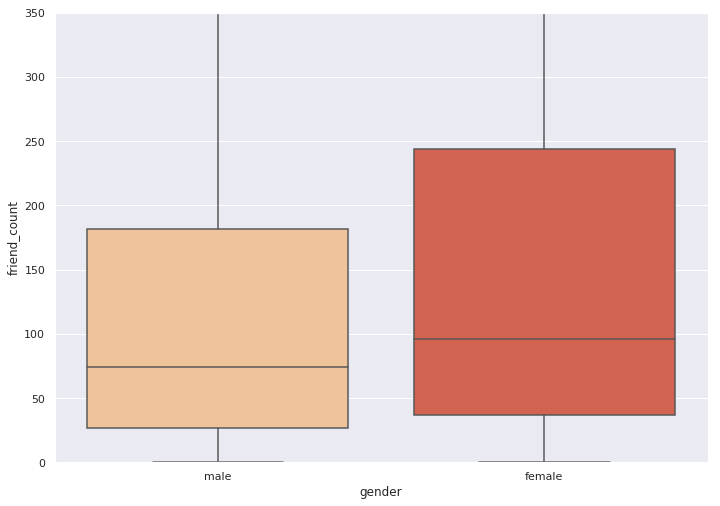

In [42]:
# ploting in box plot with friends count
g=sns.boxplot(x = "gender" , y = "friend_count" ,data=df  , palette="OrRd")
g.set(ylim=(0,350))

In [43]:
df.friend_count.loc[df.gender == "male"].describe()

count    58574.000000
mean       165.035459
std        308.466702
min          0.000000
25%         27.000000
50%         74.000000
75%        182.000000
max       4917.000000
Name: friend_count, dtype: float64

In [44]:
df.friend_count.loc[df.gender == "female"].describe()

count    40254.000000
mean       241.969941
std        476.039706
min          0.000000
25%         37.000000
50%         96.000000
75%        244.000000
max       4923.000000
Name: friend_count, dtype: float64

In [45]:
df.head(1)

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,tenure_365
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0,0.728767


[(0, 200)]

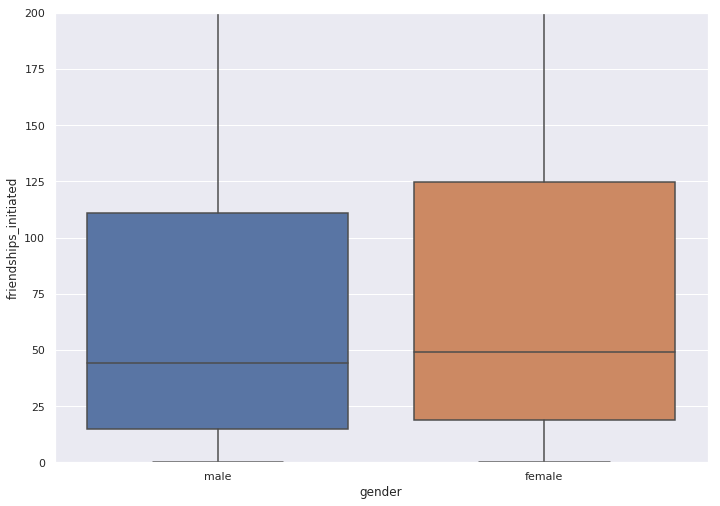

In [46]:
g = sns.boxplot(x="gender" , y="friendships_initiated"  ,data=df)
g.set(ylim=(0,200))

# Getting logical
## should we need to increase the mobile experiance ?
if our user's used the mobile deives make it 1 else 0 no matter how many time he checked in mobile 
we can use the mobile likes to create this feature

In [47]:
df.mobile_likes.describe()

count    99003.000000
mean       106.116300
std        445.252985
min          0.000000
25%          0.000000
50%          4.000000
75%         46.000000
max      25111.000000
Name: mobile_likes, dtype: float64

In [48]:
mobile_checkin = df.mobile_likes.apply(lambda x : 1 if x > 0 else 0)

In [49]:
mobile_checkin.value_counts()

1    63947
0    35056
Name: mobile_likes, dtype: int64

In [50]:
mobile_checkin.value_counts(normalize=True)

1    0.64591
0    0.35409
Name: mobile_likes, dtype: float64